In [57]:
%matplotlib qt
import mne
import os
import numpy as np

In [58]:
eeg_dat = mne.io.read_raw_edf('./session1/a_1.edf', preload=True)

Extracting edf Parameters from ./session1/a_1.edf...
Setting channel info structure...
Interpolating stim channel. Events may jitter.
Creating Raw.info structure...
Reading 0 ... 301249  =      0.000 ...  1204.996 secs...
Ready.


<ipython-input-58-cf38b9597152>:1: RuntimeWarning: Interpolating stim channel. Events may jitter.
  eeg_dat = mne.io.read_raw_edf('./session1/a_1.edf', preload=True)


In [59]:
eeg_dat.ch_names

[u'EEG FP1-REF',
 u'EEG FP2-REF',
 u'EEG F3-REF',
 u'EEG F4-REF',
 u'EEG C3-REF',
 u'EEG C4-REF',
 u'EEG P3-REF',
 u'EEG P4-REF',
 u'EEG O1-REF',
 u'EEG O2-REF',
 u'EEG F7-REF',
 u'EEG F8-REF',
 u'EEG T3-REF',
 u'EEG T4-REF',
 u'EEG T5-REF',
 u'EEG T6-REF',
 u'EEG A1-REF',
 u'EEG A2-REF',
 u'EEG FZ-REF',
 u'EEG CZ-REF',
 u'EEG PZ-REF',
 u'EEG ROC-REF',
 u'EEG LOC-REF',
 u'EEG EKG1-REF',
 u'EEG T1-REF',
 u'EEG T2-REF',
 u'PHOTIC-REF',
 u'IBI',
 u'BURSTS',
 'STI 014']

In [60]:
from collections import defaultdict
ch_types = defaultdict(str)
channel_names = []
channel_types = []

for ch in eeg_dat.ch_names:
    if 'EEG' in ch:
        ch_types[ch] = 'eeg'
    elif 'EMG' in ch:
        ch_types[ch] = 'emg'
    elif 'STI' in ch: 
        ch_types[ch] = 'stim'
    else:
        ch_types[ch] = 'misc'
        
eeg_dat.set_channel_types(ch_types)


# Example of one way to start fixing up the channels
#  Priority again is to keep everything consistent with MNE, so first check for MNE functions that can do 
#   things like this, and that can update this information insode the data.info object. 

from collections import defaultdict
ch_types = defaultdict(str)

channel_names = []
channel_types =[]

# lists to store the array names

for ch in eeg_dat.ch_names:    
    if 'EEG' in ch:
        ch_types[ch] = 'eeg'
        
    elif 'EMG' in ch:
        ch_types[ch] = 'emg'
        # Keeps track that this is an EMG channels
        
    elif 'STI' in ch:
        ch_types[ch] = 'stim'
        # Keeps track that this is an STI channel
    
    else:
        ch_types[ch] = 'misc'
        # Keeps track of MISC channels
        
eeg_dat.set_channel_types(ch_types)
        
for ch in eeg_dat.ch_names:    
    if 'EEG' in ch:
        ch = ch[4:7]
        ch =''.join(e for e in ch if e.isalnum())
        channel_names.append(ch)
        channel_types.append('eeg')
        ch_types[ch] = 'eeg'
        
    elif 'EMG' in ch:
        ch = ch[4:7]
        ch =''.join(e for e in ch if e.isalnum())
        channel_names.append(ch)
        channel_types.append('emg')
        ch_types[ch] = 'emg'
        # Keeps track that this is an EMG channels
        
    elif 'STI' in ch:
        channel_names.append(ch)
        channel_types.append('stim')
        ch_types[ch] = 'stim'
        # Keeps track that this is an STI channel
    
    else:
        channel_names.append(ch)
        channel_types.append('misc')
        ch_types[ch] = 'misc'
        # Keeps track of MISC channels
        
# The EEG channels use the standard naming strategy.
# By supplying the 'montage' parameter, approximate locations
montage = 'standard_1020'

info = mne.create_info(channel_names, eeg_dat.info['sfreq'], channel_types, montage)
print(info)

The following EEG sensors did not have a position specified in the selected montage: [u'ROC', u'LOC', u'EKG', u'T1', u'T2']. Their position has been left untouched.
<Info | 15 non-empty fields
    bads : list | 0 items
    ch_names : list | FP1, FP2, F3, F4, C3, C4, P3, P4, O1, ...
    chs : list | 30 items (EEG: 26, STIM: 1, MISC: 3)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 125.0 Hz
    meas_date : numpy.ndarray | 1969-12-31 19:00:00
    nchan : int | 30
    projs : list | 0 items
    sfreq : float | 250.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    buffer_size_sec : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    hpi_subsystem : NoneType
    kit_

<ipython-input-60-1d9a003652fe>:81: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: [u'ROC', u'LOC', u'EKG', u'T1', u'T2']. Their position has been left untouched.
  info = mne.create_info(channel_names, eeg_dat.info['sfreq'], channel_types, montage)


In [61]:
eeg_dat.info

<Info | 16 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-REF, ...
    chs : list | 30 items (EEG: 26, STIM: 1, MISC: 3)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 125.0 Hz
    meas_date : int | 1369747734
    nchan : int | 30
    projs : list | 0 items
    sfreq : float | 250.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : No

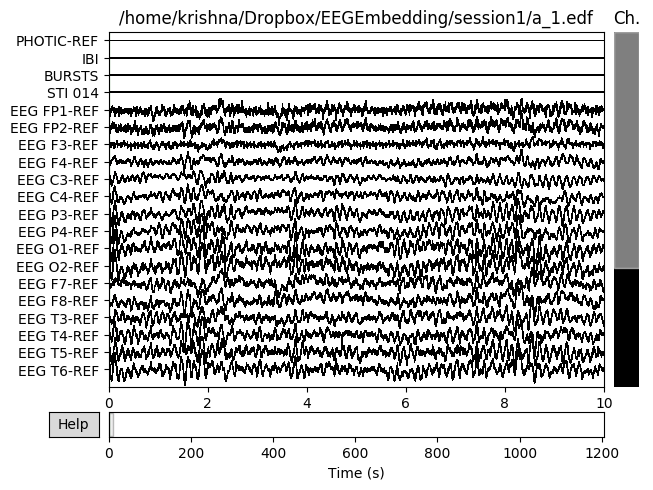

In [62]:
eeg_dat.plot()

tmax defaults to 60. in 0.14 but will change to np.inf in 0.15. Set it explicitly to avoid this warning
Effective window size : 8.192 (s)


<ipython-input-63-650886116877>:1: DeprecationWarning: tmax defaults to 60. in 0.14 but will change to np.inf in 0.15. Set it explicitly to avoid this warning
  eeg_dat.plot_psd()
/usr/local/lib/python2.7/dist-packages/mne/viz/raw.py:614: DeprecationWarning: In version 0.15 average will default to False and spatial_colors will default to True.
  'spatial_colors will default to True.', DeprecationWarning)


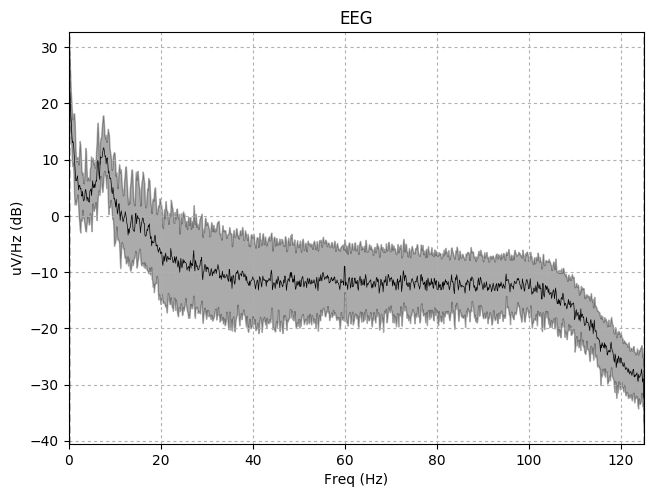

In [63]:
eeg_dat.plot_psd()

In [64]:
notches = np.arange(60, 61, 60)
eeg_dat.notch_filter(notches)
print(eeg_dat.get_data(start=0).shape)
filtered = eeg_dat.copy().filter(1, 70, h_trans_bandwidth=10)
print(filtered.get_data(start=0).shape)


Setting up band-stop filter from 59 - 61 Hz
Filter length of 3300 samples (13.200 sec) selected
(30, 301250)
Setting up band-pass filter from 1 - 70 Hz
l_trans_bandwidth chosen to be 1.0 Hz
Filter length of 1650 samples (6.600 sec) selected
(30, 301250)


In [65]:
filtered.plot_psd()
ch_names = filtered.info['ch_names']
picks = filtered.pick_channels(ch_names=ch_names)

tmax defaults to 60. in 0.14 but will change to np.inf in 0.15. Set it explicitly to avoid this warning
Effective window size : 8.192 (s)


<ipython-input-65-1667abd226ea>:1: DeprecationWarning: tmax defaults to 60. in 0.14 but will change to np.inf in 0.15. Set it explicitly to avoid this warning
  filtered.plot_psd()
/usr/local/lib/python2.7/dist-packages/mne/viz/raw.py:614: DeprecationWarning: In version 0.15 average will default to False and spatial_colors will default to True.
  'spatial_colors will default to True.', DeprecationWarning)


In [66]:
filtered.ch_names
data = filtered.get_data(start=0, stop=250)

print(data.shape)

(30, 250)


In [67]:
data2 = mne.time_frequency.stft(data, wsize=140, tstep=2)

print(data2.shape)

Number of frequencies: 71
Number of time steps: 125
(30, 71, 125)


In [68]:
filtered.ch_names

[u'EEG FP1-REF',
 u'EEG FP2-REF',
 u'EEG F3-REF',
 u'EEG F4-REF',
 u'EEG C3-REF',
 u'EEG C4-REF',
 u'EEG P3-REF',
 u'EEG P4-REF',
 u'EEG O1-REF',
 u'EEG O2-REF',
 u'EEG F7-REF',
 u'EEG F8-REF',
 u'EEG T3-REF',
 u'EEG T4-REF',
 u'EEG T5-REF',
 u'EEG T6-REF',
 u'EEG A1-REF',
 u'EEG A2-REF',
 u'EEG FZ-REF',
 u'EEG CZ-REF',
 u'EEG PZ-REF',
 u'EEG ROC-REF',
 u'EEG LOC-REF',
 u'EEG EKG1-REF',
 u'EEG T1-REF',
 u'EEG T2-REF',
 u'PHOTIC-REF',
 u'IBI',
 u'BURSTS',
 'STI 014']